# Pré-processamento

In [10]:
import matplotlib
import mne

%matplotlib inline

### Carregando dados do arquivo

In [11]:
epochs = mne.read_epochs('files/ssvep-epo.fif')
event = '4'

Reading files/ssvep-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    4816.00 ms
        0 CTF compensation matrices available
125 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


## Filtros temporais

- Passa-alta
- Passa-baixa
- Passa-faixa
- Rejeita-faixa

### Passa-alta

Setting up low-pass filter at 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 237 samples (0.948 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


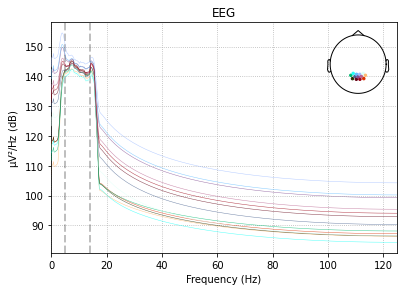

In [12]:
epo_h = epochs.copy().filter(l_freq=None, h_freq=14.)
epo_h[event].plot_psd()
print('')

### Passa-baixa

Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 413 samples (1.652 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


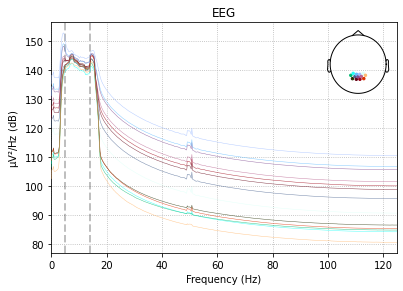

In [13]:
epo_l = epochs.copy().filter(l_freq=5, h_freq=None)
epo_l[event].plot_psd()
print('')

### Passa-faixa

Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 413 samples (1.652 sec)

Setting up low-pass filter at 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 237 samples (0.948 sec)

    Using multitaper spectrum estimation with 7 DPSS windows


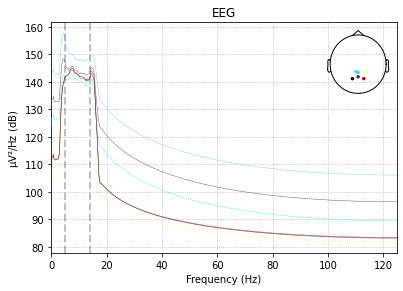

In [8]:
epo_b = epochs.copy().filter(l_freq=5, h_freq=None)
epo_b.filter(l_freq=None, h_freq=14)
epo_b[event].plot_psd()
print('')

### Rejeita-faixa

In [14]:
a = epochs.get_data()
a = a.transpose(1, 0, 2)
a = a.reshape(13, 125 * 1205)

info = mne.create_info(ch_names=13,
                       sfreq=241.,
                       ch_types='eeg')

raw = mne.io.RawArray(a, info)

Creating RawArray with float64 data, n_channels=13, n_times=150625
    Range : 0 ... 150624 =      0.000 ...   624.996 secs
Ready.


## Questões de projeto

1. Como saber quais são os eletrodos a serem utilizados como referência?

Resposta: eletrodos da região occipital e para-occiptial, pois é nessas área do cerebro que as informações visuais são processadas.

2. A média de TODOS os eletrodos é um bom chute?

Resposta: não, pois podem existir um ruido de eletrodos não tão interessantes para o experimento.

3. Como utilizar as informações de retorno do método set_eeg_reference

Resposta: A referência influencia a amplitude em cada canal EEG e ponto de tempo: ela define o nível de tensão zero e todos os outros canais são expressos em relação a ela. Os canais localizados próximos à referência são, portanto, provavelmente afetados por atividades elétricas semelhantes. Sua diferença de potencial em relação à referência, ou seja, sua amplitude, será, portanto, bastante pequena. Em contraste, os canais distantes da referência também são potencialmente afetados por outras fontes elétricas (por exemplo, outra atividade cerebral ou ruído)